### Example 6.2 Random Walk

In [1]:
import numpy as np
import matplotlib.pyplot as plt

states=[0,1,2,3,4,5,6]
actions=[-1,1]
V_true=np.arange(1,6)/6.0

def step(s,a):
      
    s_=s+a
    
    if s_==0:
        return s_,0,True
    elif s_==6:
        return s_,1,True 
    else:
        return s_,0,False


def get_td_v(n_eps,lr):
    
    V=np.ones(len(states))*0.5
    rms=[]
    
    for ep in range(n_eps):

        s=np.random.choice(states[1:6])

        while True:     

            s_old=s
            #v_all.append(V[s_old])
            a=np.random.choice(actions)
            s,r,done=step(s_old,a)

            if done:
                V[s_old]+=lr*(r-V[s_old])
            else:
                V[s_old]+=lr*(r+V[s]-V[s_old])

            #traj.append(s)
            #rs.append(r)
            if done:
                break
                
        rms.append(np.sqrt(np.sum(np.power(V_true-V[1:6],2))/5.0))
                
    return V,rms

v1,rms1=get_td_v(1,lr=0.1)
v10,rms10=get_td_v(10,lr=0.1)
v100,rms100=get_td_v(100,lr=0.1)

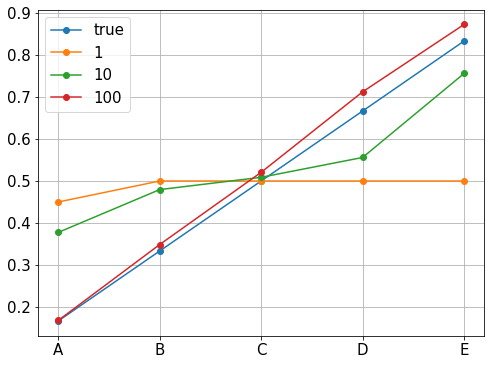

In [3]:
plt.figure(figsize=(8,6))
plt.plot(range(1,6),V_true,'-o',label='true')
plt.plot(range(1,6),v1[1:6],'-o',label='1')
plt.plot(range(1,6),v10[1:6],'-o',label='10')
plt.plot(range(1,6),v100[1:6],'-o',label='100')
plt.grid()
plt.xticks(range(1,6),('A','B','C','D','E'),fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
#plt.savefig('td_randomwalk.png',dpi=350)

In [5]:
np.set_printoptions(suppress=True)

def get_mc_v(n_eps,lr):
    
    V=np.ones(len(states))*0.5
    rms=[]
    
    for ep in range(n_eps):

        s=np.random.choice(states[1:6])
        traj=[s]

        while True:     

            s_old=s
            a=np.random.choice(actions)
            s,r,done=step(s_old,a)
            
            traj.append(s)

            if done:
                break
        #print(r)
        for t in traj:
            V[t]+=lr*(r-V[t])
            
        rms.append(np.sqrt(np.sum(np.power(V_true-V[1:6],2))/5.0))
                
    return V,rms

v100,rms100=get_mc_v(100000,lr=0.01)

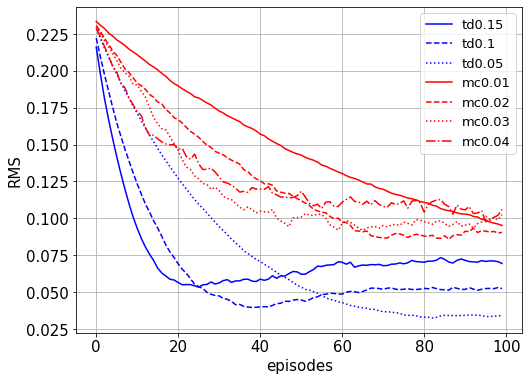

In [31]:
lr_td=[0.15,0.1,0.05]
lr_mc=[0.01,0.02,0.03,0.04]

ls=['-','--',':','-.']
plt.figure(figsize=(8,6))

for i,lr in enumerate(lr_td):
    rms_all=[]
    for j in range(100):
        _,rms=get_td_v(100,lr=lr)
        rms_all.append(rms)
        
    plt.plot(np.array(rms_all).mean(axis=0),color='b',label='td'+str(lr),linestyle=ls[i])
    
for i,lr in enumerate(lr_mc):
    rms_all=[]
    for j in range(100):
        _,rms=get_mc_v(100,lr=lr)
        rms_all.append(rms)

    plt.plot(np.array(rms_all).mean(axis=0),color='r',label='mc'+str(lr),linestyle=ls[i])
    
plt.legend(loc='upper right',fontsize=13)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('episodes',fontsize=15)
plt.ylabel('RMS',fontsize=15)
plt.savefig('td_mc_randomwalk.png',dpi=350)